### Drive mount

In [8]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!ls weather/minnesota_daily

72644.csv  KBBB0.csv  KDTL0.csv  KGDB0.csv  KLXL0.csv  KOVL0.csv  KSYN0.csv
72655.csv  KBDE0.csv  KDXX0.csv  KGHW0.csv  KLYV0.csv  KOWA0.csv  KTKC0.csv
72658.csv  KBDH0.csv  KDYT0.csv  KGNA0.csv  KMGG0.csv  KPEX0.csv  KTOB0.csv
72745.csv  KBFW0.csv  KELO0.csv  KGPZ0.csv  KMIC0.csv  KPKD0.csv  KTWM0.csv
72747.csv  KBRD0.csv  KETH0.csv  KGYL0.csv  KMJQ0.csv  KPNM0.csv  KULM0.csv
72755.csv  KCBG0.csv  KEVM0.csv  KHCD0.csv  KMKT0.csv  KPQN0.csv  KVVV0.csv
9NRIJ.csv  KCDD0.csv  KFBL0.csv  KHCO0.csv  KMML0.csv  KPWC0.csv  KXVG0.csv
KACQ0.csv  KCFE0.csv  KFCM0.csv  KHIB0.csv  KMOX0.csv  KRGK0.csv  KY490.csv
KADC0.csv  KCKC0.csv  KFFM0.csv  KHZX0.csv  KMVE0.csv  KROS0.csv  KY630.csv
KAEL0.csv  KCKN0.csv  KFGN0.csv  KJKJ0.csv  KMWM0.csv  KRRT0.csv  P6529.csv
KAIT0.csv  KCNB0.csv  KFKA0.csv  KJMR0.csv  KMZH0.csv  KRYM0.csv  UYB6K.csv
KAQP0.csv  KCOQ0.csv  KFOZ0.csv  KJYG0.csv  KONA0.csv  KSAZ0.csv  X9FED.csv
KAUM0.csv  KCQM0.csv  KFRM0.csv  KLJF0.csv  KORB0.csv  KSGS0.csv  Z7ZOG.csv
KAXN0.csv  K

In [ ]:
!ls weather/prediction_targets_daily


ACAvNTuEuFWcmwms.csv  hyJYtiZVQReIVdsG.csv  qytCYwCGfuRVAAQu.csv
aCyjhOAKburculfr.csv  ibNECcZxBjXmgDJv.csv  qzNGumaBZxhskUoo.csv
aguYhpcOJECNEkLI.csv  IbZapgLZIHVNzxYD.csv  RfnwXzFAVgaCkooQ.csv
alTjbdTsAKACZrGW.csv  IdEwRtQFwaBeuVkx.csv  RmKFazJshnbhmllZ.csv
AmezwjsXKaggSICV.csv  iGuxDcFVLcFsRHEF.csv  rtqhCSpxgNCmJyPq.csv
aNBbBQsLuzazxQDL.csv  iPHJagJXuAbbnUjY.csv  RYojISzSzEucMKAn.csv
asHxfMpWqfgGesmE.csv  IuUAGHGofIeJLHnH.csv  RYwPCvMjDxnaxxIl.csv
AvjrUfvxwfPdFfLD.csv  IxgvjXiglJAGivvE.csv  RZuZxKcThxwMjsZW.csv
AWUpGSoLMOQdgmLf.csv  IZyGvQGXjFzxRclM.csv  SMzTryVSsLYiDffQ.csv
bbgJkKcyqqeAoUmb.csv  JaPEbeWwoWjEmfby.csv  SPUDFpbOKfxImkCu.csv
bJfBssUbPvnDtmOe.csv  jDsGBzbNJYdlmAAH.csv  sqyartViwauAaeAG.csv
BLEPTCvUWUfqXlBZ.csv  jkRuHBdXFDuftVhB.csv  SrpfMxeODednwaWu.csv
blQNDrHzYqRtIosO.csv  jmBvCLBnmEGYpoWE.csv  SrQKALIejdsSbuTR.csv
BofeRsvmlMshSjdM.csv  jmMgMWQBSxRZTtue.csv  SZQJwFwnyNwTEUYX.csv
bPMEvvoXITYrIihW.csv  jPtVUBdQYCOrNyhY.csv  sZzqfFiyGsphtGUL.csv
bSPKHafUgTavIUPl.csv  JqV

#Testing

#Data exploration


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [215]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [216]:
from shapely import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [5]:
county_loc_ds = pd.read_csv("agri/minnesota_county_location.csv")
county_loc_ds

,county_name,capital_name,county_latitude,county_longitude
0,Aitkin County,Aitkin,46.571482,-93.384760
1,Anoka County,Anoka,45.271020,-93.282763
2,Becker County,Detroit Lakes,46.817181,-95.845325
3,Beltrami County,Bemidji,47.478542,-94.890787
4,Benton County,Foley,45.663512,-93.913728
...,...,...,...,...
82,Watonwan County,St. James,43.982458,-94.626918
83,Wilkin County,Breckenridge,46.265205,-96.581626
84,Winona County,Winona,43.958227,-91.780778
85,Wright County,Buffalo,45.171908,-93.874694


In [6]:
country_yr_prd_ds = pd.read_csv("agri/minnesota_county_yearly_agricultural_production.csv")
country_yr_prd_ds

,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
0,1950,AITKIN,BARLEY,BARLEY,600,"16,200",27.0
1,1950,AITKIN,CORN,"CORN, GRAIN","4,800","72,000",15.0
2,1950,AITKIN,FLAXSEED,FLAXSEED,"1,000","7,000",7.0
3,1950,AITKIN,HAY,HAY,"49,200",NaN,NaN
4,1950,AITKIN,OATS,OATS,"7,900","213,300",27.0
...,...,...,...,...,...,...,...
56263,2021,WRIGHT,CORN,"CORN, GRAIN","76,600","11,092,000",144.8
56264,2021,WRIGHT,OATS,OATS,"1,350","65,600",48.6
56265,2021,WRIGHT,SOYBEANS,SOYBEANS,"71,100","3,278,000",46.1
56266,2021,WRIGHT,WHEAT,"WHEAT, SPRING, (EXCL DURUM)","1,110","51,200",46.1


## Mapping

State boundaries shape <br>
https://gisdata.mn.gov/dataset/bdry-state-of-minnesota <br>
County boundaries shape <br>
https://gisdata.mn.gov/dataset/bdry-counties-in-minnesota

In [18]:
!ls 

'ls' is not recognized as an internal or external command,
operable program or batch file.


<Axes: >

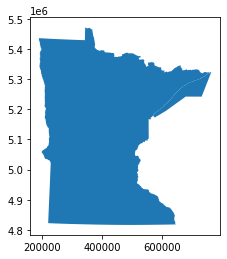

In [21]:
state_map = gpd.read_file("bdry_state_of_minnesota.gpkg")
state_map.plot()

<Axes: >

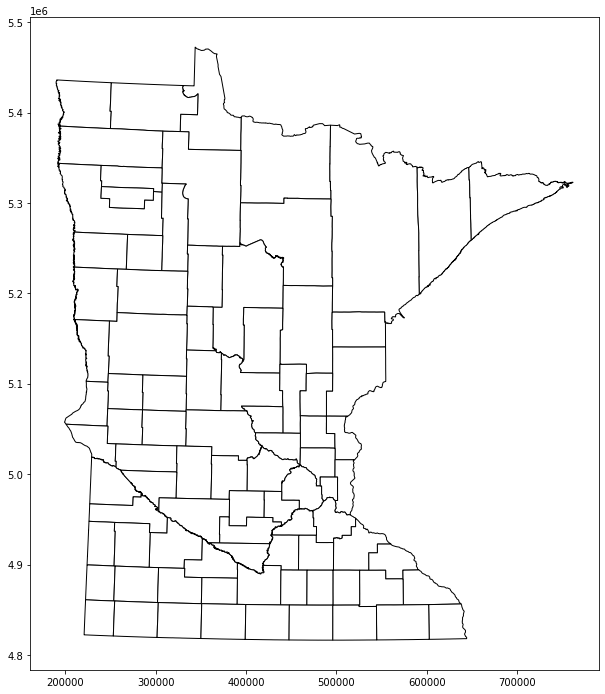

In [7]:
counties_map = gpd.read_file("bdry_counties_in_minnesota.gpkg")
counties_map.plot(figsize =(12,12),color="white", edgecolor="black")

In [23]:
counties_map

,AREA,PERIMETER,CTYONLY_,CTYONLY_ID,COUN,CTY_NAME,CTY_ABBR,CTY_FIPS,geometry
0,4.608321e+09,388250.145723,2.0,1.0,39,Lake of the Woods,LOTW,77,"MULTIPOLYGON (((330081.663 5429937.085, 330973..."
1,2.862184e+09,263017.482774,3.0,2.0,35,Kittson,KITT,69,"MULTIPOLYGON (((250934.678 5433053.183, 250908..."
2,4.347099e+09,302590.752930,4.0,3.0,68,Roseau,ROSE,135,"MULTIPOLYGON (((250934.678 5433053.183, 251190..."
3,8.167238e+09,412897.435943,5.0,4.0,36,Koochiching,KOOC,71,"MULTIPOLYGON (((394785.782 5395220.852, 395221..."
4,4.698732e+09,374207.651291,6.0,5.0,45,Marshall,MARS,89,"MULTIPOLYGON (((249941.883 5382327.086, 251522..."
...,...,...,...,...,...,...,...,...,...
112,8.844817e+03,419.521202,114.0,113.0,16,Cook,COOK,31,"MULTIPOLYGON (((754614.628 5317647.962, 754616..."
113,4.638027e+03,312.399385,115.0,114.0,16,Cook,COOK,31,"MULTIPOLYGON (((755151.634 5317121.803, 755169..."
114,6.627648e+04,2644.849287,116.0,115.0,16,Cook,COOK,31,"MULTIPOLYGON (((656853.113 5265231.379, 656857..."
115,6.915989e+02,103.083929,117.0,116.0,38,Lake,LAKE,75,"MULTIPOLYGON (((631078.163 5236647.598, 631081..."


In [8]:
county_loc_ds

,county_name,capital_name,county_latitude,county_longitude
0,Aitkin County,Aitkin,46.571482,-93.384760
1,Anoka County,Anoka,45.271020,-93.282763
2,Becker County,Detroit Lakes,46.817181,-95.845325
3,Beltrami County,Bemidji,47.478542,-94.890787
4,Benton County,Foley,45.663512,-93.913728
...,...,...,...,...
82,Watonwan County,St. James,43.982458,-94.626918
83,Wilkin County,Breckenridge,46.265205,-96.581626
84,Winona County,Winona,43.958227,-91.780778
85,Wright County,Buffalo,45.171908,-93.874694


In [ ]:
counties_map= counties_map.drop_duplicates(subset=['CTY_ABBR'])
ax = counties_map.plot(figsize =(20,20),color="white", edgecolor="black")
plt.rcParams.update({'font.size': 10})
counties_map.apply(lambda x: ax.annotate(text=x['CTY_ABBR'],xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

In [20]:
station_pos = pd.read_csv("weather/Minnesota Station location list.csv")
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(station_pos['Longitude'], station_pos['Latitude'])]
station_pos = gpd.GeoDataFrame(station_pos, 
                          crs = crs, 
                          geometry = geometry)
counties_map.crs


c:\Users\XY\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Projected CRS: EPSG:26915>
Name: NAD83 / UTM zone 15N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 96°W and 90°W - onshore and offshore. Canada - Manitoba; Nunavut; Ontario. United States (USA) - Arkansas; Illinois; Iowa; Kansas; Louisiana; Michigan; Minnesota; Mississippi; Missouri; Nebraska; Oklahoma; Tennessee; Texas; Wisconsin.
- bounds: (-96.0, 25.61, -90.0, 84.0)
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(county_loc_ds['county_longitude'], county_loc_ds['county_latitude'])]
counties_gds = gpd.GeoDataFrame(county_loc_ds, 
                          crs = crs, 
                          geometry = geometry)
counties_gds.crs

c:\Users\XY\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

TypeError: cannot unpack non-iterable NoneType object

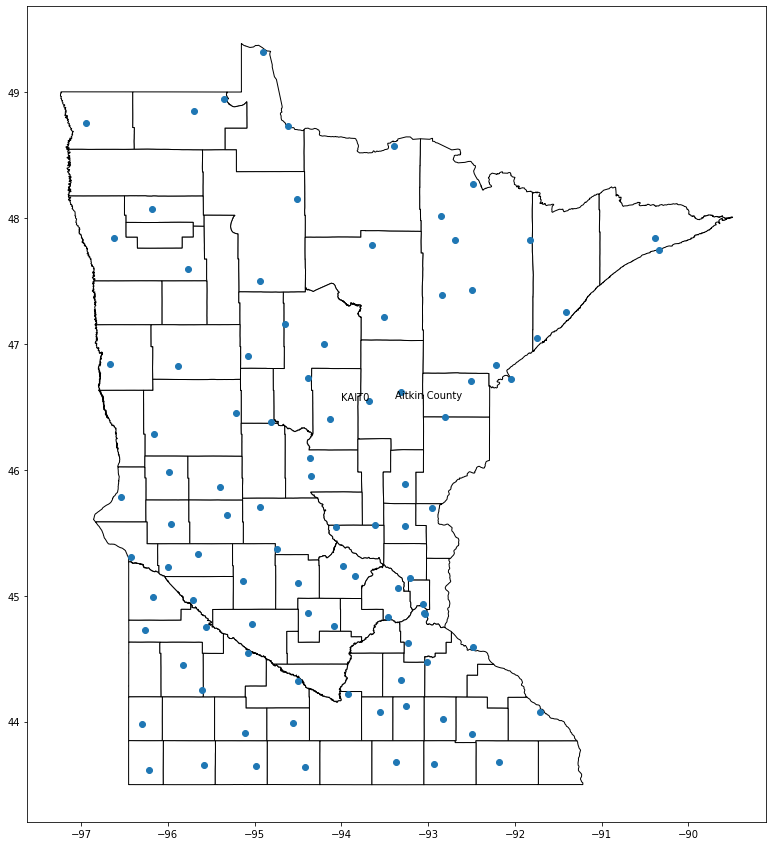

In [23]:
import matplotlib as plt
counties_map= counties_map.drop_duplicates(subset=['CTY_ABBR'])
counties_map = counties_map.to_crs("EPSG:4326")
fig, ax = plt.pyplot.subplots(figsize = (15,15))
counties_map.plot(color="white", edgecolor="black",ax=ax)
plt.rcParams.update({'font.size': 10})
#counties_map.apply(lambda x: ax.annotate(text=x['CTY_ABBR'],xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
#station_pos = station_pos.to_crs("EPSG:26915")
station_pos.apply(lambda x: ax.annotate(text=x['Code'],xy=x.geometry.centroid.coords[0], ha='right') if (x['Code'] == "KAIT0") else None , axis=1)
station_pos.plot(ax=ax)
counties_gds.apply(lambda x: ax.annotate(text=x['county_name'],xy=x.geometry.centroid.coords[0] if (x['capital_name'] == "Aitkin") else None , ha='left'), axis=1)
counties_gds.plot(ax=ax,color="red")

Without annotation


<Axes: >

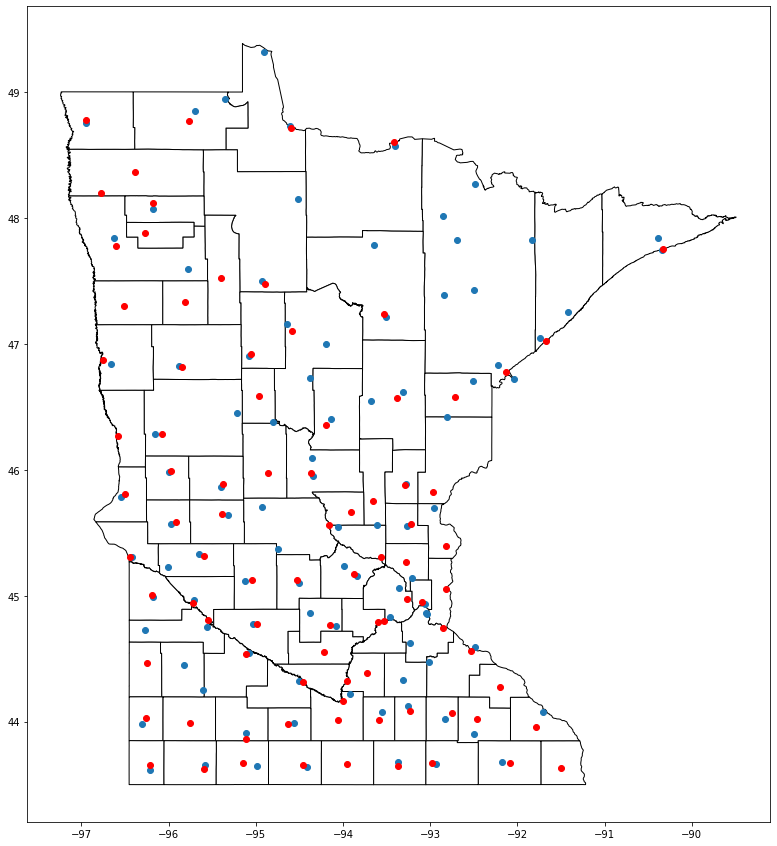

In [36]:
counties_map= counties_map.drop_duplicates(subset=['CTY_ABBR'])
counties_map = counties_map.to_crs("EPSG:4326")
fig, ax = plt.pyplot.subplots(figsize = (15,15))
counties_map.plot(color="white", edgecolor="black",ax=ax)
plt.rcParams.update({'font.size': 10})
#counties_map.apply(lambda x: ax.annotate(text=x['CTY_ABBR'],xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
#station_pos = station_pos.to_crs("EPSG:26915")
station_pos.plot(ax=ax)
counties_gds.plot(ax=ax,color="red")

#Data prep

## Datatypes

In [10]:
crop_df = pd.read_csv('agri/minnesota_county_yearly_agricultural_production.csv')

In [11]:
pd.unique(crop_df['Commodity'])

array(['BARLEY', 'CORN', 'FLAXSEED', 'HAY', 'OATS', 'RYE', 'SOYBEANS',
       'WHEAT', 'SUGARBEETS', 'SUNFLOWER', 'BEANS', 'CANOLA'],
      dtype=object)

In [12]:
pd.unique(crop_df['County'])

array(['AITKIN', 'ANOKA', 'BECKER', 'BELTRAMI', 'BENTON', 'BIG STONE',
       'BLUE EARTH', 'BROWN', 'CARLTON', 'CARVER', 'CASS', 'CHIPPEWA',
       'CHISAGO', 'CLAY', 'CLEARWATER', 'COTTONWOOD', 'CROW WING',
       'DOUGLAS', 'FARIBAULT', 'FREEBORN', 'GRANT', 'HENNEPIN', 'HUBBARD',
       'ISANTI', 'ITASCA', 'JACKSON', 'KANABEC', 'KANDIYOHI', 'KITTSON',
       'KOOCHICHING', 'LAC QUI PARLE', 'LAKE', 'LAKE OF THE WOODS',
       'LE SUEUR', 'LINCOLN', 'LYON', 'MAHNOMEN', 'MARSHALL', 'MARTIN',
       'MCLEOD', 'MEEKER', 'MILLE LACS', 'MORRISON', 'MURRAY', 'NICOLLET',
       'NOBLES', 'NORMAN', 'OTTER TAIL', 'PENNINGTON', 'PINE',
       'PIPESTONE', 'POLK', 'POPE', 'RAMSEY', 'RED LAKE', 'REDWOOD',
       'RENVILLE', 'RICE', 'ROCK', 'ROSEAU', 'SCOTT', 'SHERBURNE',
       'SIBLEY', 'ST. LOUIS', 'STEARNS', 'STEELE', 'STEVENS', 'SWIFT',
       'TODD', 'TRAVERSE', 'WADENA', 'WASECA', 'WASHINGTON', 'WATONWAN',
       'WILKIN', 'WRIGHT', 'YELLOW MEDICINE', 'COOK',
       'OTHER (COMBINED) COUNTI

In [13]:
crop_df.loc[crop_df['County'] == "ANOKA"]


,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
11,1950,ANOKA,BARLEY,BARLEY,130,"3,250",25.0
12,1950,ANOKA,CORN,"CORN, GRAIN","20,400","571,200",28.0
13,1950,ANOKA,FLAXSEED,FLAXSEED,10,100,10.0
14,1950,ANOKA,HAY,HAY,"23,500",NaN,NaN
15,1950,ANOKA,OATS,OATS,"8,700","243,600",28.0
...,...,...,...,...,...,...,...
55654,2020,ANOKA,CORN,"CORN, SILAGE",280,NaN,NaN
55655,2020,ANOKA,SOYBEANS,SOYBEANS,"3,240","148,000",45.7
55977,2021,ANOKA,CORN,CORN,NaN,NaN,NaN
55978,2021,ANOKA,CORN,"CORN, GRAIN","4,100","460,000",112.2


Itt a County rövidítésnél feljött egy probléma:

In [14]:
crops = {}
for i in pd.unique(crop_df['County']):
  crops[i] = {}
  for j in pd.unique(crop_df['Commodity']):
    crops[i][j] = crop_df.loc[crop_df['County'] == i].loc[crop_df['Commodity'] == j].copy(deep=True).reset_index(drop=True)

Ha a fenti metódust használjuk a kkor a teljes kódneve benne lesz egy egy megyének ami nem kompatibilis a később kialakított 4 betűs rövidítésekkel ezért máshogy kell majd megcsinálni a crops dict-et

In [15]:
crop_df_counties = pd.unique(crop_df['County'])
crop_df_counties = [ s.replace(' ','')[:4] for s in crop_df_counties]


All kinds of commodities:
``` 'BARLEY', 'CORN', 'FLAXSEED', 'HAY', 'OATS', 'RYE', 'SOYBEANS', 'WHEAT', 'SUGARBEETS', 'SUNFLOWER', 'BEANS', 'CANOLA' ```

In [16]:
crops = {}
for i in pd.unique(crop_df['County']):
  crops[i] = {}
  for j in pd.unique(crop_df['Commodity']):
    crops[i][j] = crop_df.loc[crop_df['County'] == i].loc[crop_df['Commodity'] == j].copy(deep=True).reset_index(drop=True)

In [17]:
crops['ANOKA']['WHEAT']

,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
0,1950,ANOKA,WHEAT,WHEAT,530,"9,860",18.6
1,1950,ANOKA,WHEAT,"WHEAT, SPRING, (EXCL DURUM)",80,960,12.0
2,1950,ANOKA,WHEAT,"WHEAT, SPRING, DURUM",20,300,15.0
3,1950,ANOKA,WHEAT,"WHEAT, WINTER",430,"8,600",20.0
4,1951,ANOKA,WHEAT,WHEAT,660,"12,960",19.6
...,...,...,...,...,...,...,...
69,1986,ANOKA,WHEAT,WHEAT,500,"17,000",34.0
70,1986,ANOKA,WHEAT,"WHEAT, SPRING, (EXCL DURUM)",300,"10,800",36.0
71,1998,ANOKA,WHEAT,WHEAT,"1,000","37,100",37.1
72,2001,ANOKA,WHEAT,WHEAT,"1,400","53,200",38.0


In [311]:
crops.keys()

dict_keys(['AITKIN', 'ANOKA', 'BECKER', 'BELTRAMI', 'BENTON', 'BIG STONE', 'BLUE EARTH', 'BROWN', 'CARLTON', 'CARVER', 'CASS', 'CHIPPEWA', 'CHISAGO', 'CLAY', 'CLEARWATER', 'COTTONWOOD', 'CROW WING', 'DOUGLAS', 'FARIBAULT', 'FREEBORN', 'GRANT', 'HENNEPIN', 'HUBBARD', 'ISANTI', 'ITASCA', 'JACKSON', 'KANABEC', 'KANDIYOHI', 'KITTSON', 'KOOCHICHING', 'LAC QUI PARLE', 'LAKE', 'LAKE OF THE WOODS', 'LE SUEUR', 'LINCOLN', 'LYON', 'MAHNOMEN', 'MARSHALL', 'MARTIN', 'MCLEOD', 'MEEKER', 'MILLE LACS', 'MORRISON', 'MURRAY', 'NICOLLET', 'NOBLES', 'NORMAN', 'OTTER TAIL', 'PENNINGTON', 'PINE', 'PIPESTONE', 'POLK', 'POPE', 'RAMSEY', 'RED LAKE', 'REDWOOD', 'RENVILLE', 'RICE', 'ROCK', 'ROSEAU', 'SCOTT', 'SHERBURNE', 'SIBLEY', 'ST. LOUIS', 'STEARNS', 'STEELE', 'STEVENS', 'SWIFT', 'TODD', 'TRAVERSE', 'WADENA', 'WASECA', 'WASHINGTON', 'WATONWAN', 'WILKIN', 'WRIGHT', 'YELLOW MEDICINE', 'COOK', 'OTHER (COMBINED) COUNTIES'])

In [24]:
import os

station_dict = {key: [] for key in station_pos['Code']}
station_data = os.listdir('weather/minnesota_daily')
path = 'weather/minnesota_daily/'
for i in station_data:
  name = i.split('.')[0]
  station_dict[name]  = pd.read_csv(path+i,header = None,names = ['date','tavg','tmin','tmax','prcp'])
  #station_dict[name]['date'] = pd.to_datetime(station_dict[name]['date'])
  #station_dict[name]=station_dict[name].set_index('date')

In [19]:
import os


target_dict = {}
target_data = os.listdir('weather/prediction_targets_daily/')
path = 'weather/prediction_targets_daily/'
for i in target_data:
  name = i.split('.')[0]
  target_dict[name]  = pd.read_csv(path+i,header = None,names = ['date','tavg','tmin','tmax','prcp'])
  #station_dict[name]['date'] = pd.to_datetime(station_dict[name]['date'])
  #station_dict[name]=station_dict[name].set_index('date')

In [ ]:
target_dict

In [26]:
county_ds = pd.read_csv("agri/minnesota_county_location.csv")
station_ds = pd.read_csv("weather/Minnesota Station location list.csv")

In [27]:
county_loc_ds = county_ds[['county_latitude','county_longitude']]
station_loc_ds = station_ds[['Latitude','Longitude']]

In [28]:
county_loc_ds

,county_latitude,county_longitude
0,46.571482,-93.384760
1,45.271020,-93.282763
2,46.817181,-95.845325
3,47.478542,-94.890787
4,45.663512,-93.913728
...,...,...
82,43.982458,-94.626918
83,46.265205,-96.581626
84,43.958227,-91.780778
85,45.171908,-93.874694


The main idea here is that the closer the weather station the bigger impact it has on the outcome

## distMatrix

In [29]:
def distance_matrix(a,b):
  
  res = np.zeros((len(a),len(b)))
  n=0
  for i in a.values:
    m=0
    for j in b.values:
      res[n][m] = np.linalg.norm(i - j)
      m+=1
    n +=1
  return res

In [30]:
print(distance_matrix(county_loc_ds,station_loc_ds))

[[1.22727267 1.99527601 1.73733885 ... 2.63978464 2.81418132 1.80558107]
 [0.82455279 3.29776509 0.46653257 ... 1.93747879 1.57873734 2.77355874]
 [2.19137366 3.00673096 3.40855072 ... 2.39435404 4.43859711 1.1393118 ]
 ...
 [2.77800709 4.88465967 1.56084794 ... 3.35196787 0.72157475 4.74157643]
 [0.41796533 3.4278192  0.87935916 ... 1.35742924 1.87284138 2.55747081]
 [1.65827409 4.32626943 2.4962202  ... 0.53371586 3.17860834 2.75884207]]


In [31]:
print(distance_matrix(county_loc_ds,station_loc_ds))

[[1.22727267 1.99527601 1.73733885 ... 2.63978464 2.81418132 1.80558107]
 [0.82455279 3.29776509 0.46653257 ... 1.93747879 1.57873734 2.77355874]
 [2.19137366 3.00673096 3.40855072 ... 2.39435404 4.43859711 1.1393118 ]
 ...
 [2.77800709 4.88465967 1.56084794 ... 3.35196787 0.72157475 4.74157643]
 [0.41796533 3.4278192  0.87935916 ... 1.35742924 1.87284138 2.55747081]
 [1.65827409 4.32626943 2.4962202  ... 0.53371586 3.17860834 2.75884207]]


In [32]:
def find_closest_n(a,b,a_cols,b_cols,n=2):
  mat=distance_matrix(a,b)
  #df = pd.DataFrame(mat,columns=b_cols)
  #index_m = np.zeros((len(a_cols),2))
  res = pd.DataFrame(index=range(len(a_cols)),columns=range(n))
  for i in range(len(mat)):
    for d in range(n):
      tempmat = mat[i]
      res[d][i] =b_cols[np.where(tempmat == np.min(tempmat))[0]].values[0]
      tempmat[np.where(tempmat == np.min(tempmat))[0]] = np.Inf
      #print(b_cols[np.where(tempmat == np.min(tempmat))[0]].values)
      #res[d][i] =np.where(tempmat == np.min(tempmat))[0]
  df = pd.concat([a_cols,res],axis = 1)
  return df

In [33]:
station_ds[station_ds.columns[0]][1]

'72747'

In [53]:
station_ds[station_ds.columns[0]]

0     72655
1     72747
2     72658
3     72745
4     KAXN0
      ...  
92    X9FED
93    9NRIJ
94    Z7ZOG
95    72644
96    72755
Name: Code, Length: 97, dtype: object

In [36]:
county_ds_abbr = county_ds.assign(county_abbr = lambda x: x['county_name'])
#county_ds_abbr['county_abbr'] = [ s.replace('Lac qui Parle County','Lac Qui Parle County')  for s in county_ds_abbr['county_abbr']]
#county_abbr_mod['CTY_NAME'] = [s.replace('St.', 'Saint') + ' County' for s in county_abbr['CTY_NAME']]
county_ds_abbr['county_abbr'] = [ s.replace(' County','').replace('Saint','St.').upper() for s in county_ds_abbr['county_abbr']]
#s = [item.capitalize() for item in s]
county_ds_abbr

,county_name,capital_name,county_latitude,county_longitude,county_abbr
0,Aitkin County,Aitkin,46.571482,-93.384760,AITKIN
1,Anoka County,Anoka,45.271020,-93.282763,ANOKA
2,Becker County,Detroit Lakes,46.817181,-95.845325,BECKER
3,Beltrami County,Bemidji,47.478542,-94.890787,BELTRAMI
4,Benton County,Foley,45.663512,-93.913728,BENTON
...,...,...,...,...,...
82,Watonwan County,St. James,43.982458,-94.626918,WATONWAN
83,Wilkin County,Breckenridge,46.265205,-96.581626,WILKIN
84,Winona County,Winona,43.958227,-91.780778,WINONA
85,Wright County,Buffalo,45.171908,-93.874694,WRIGHT


In [37]:
for i in county_ds[county_ds.columns[0]]:
  county_abbr_mod[county_abbr_mod['CTY_NAME']==i]['CTY_ABBR']

NameError: name 'county_abbr_mod' is not defined

In [38]:
county_ds[county_ds[county_ds.columns[0]] == 'Saint Louis County'].index

Int64Index([68], dtype='int64')

In [39]:
ds = find_closest_n(county_loc_ds,station_loc_ds,county_ds_abbr[county_ds_abbr.columns[-1]],station_ds[station_ds.columns[0]])

In [40]:
ds

,county_abbr,0,1
0,AITKIN,KHZX0,KAIT0
1,ANOKA,9NRIJ,KMIC0
2,BECKER,KDTL0,KFFM0
3,BELTRAMI,72755,KY490
4,BENTON,72655,KPNM0
...,...,...,...
82,WATONWAN,KJYG0,KULM0
83,WILKIN,KFFM0,KETH0
84,WINONA,KONA0,KFKA0
85,WRIGHT,KCFE0,KMGG0


In [41]:
station_dict[ds[0][0]]

,date,tavg,tmin,tmax,prcp
0,2006-01-01,-4.3,-12.0,0.0,NaN
1,2006-01-02,-0.4,-1.0,0.0,NaN
2,2006-01-03,0.3,0.0,1.0,NaN
3,2006-01-04,-0.4,-2.0,0.0,NaN
4,2006-01-05,-2.0,-3.0,-1.0,NaN
...,...,...,...,...,...
4829,2022-06-13,16.0,12.0,23.0,21.6
4830,2022-06-14,22.0,11.0,32.0,0.0
4831,2022-06-15,20.5,17.0,25.0,11.8
4832,2022-06-16,19.3,16.4,21.5,0.2


# Imputálás


## gigadf

Ennek a résznek az a lényege hogy egy mergelt ds-t csináljunk amiben az összes adatra rá tud trainelni és nem csak egyféle ds-en dolgozik hanem egyszerre az összesen

In [65]:
station_dict['72655'].columns

Index(['date', 'tavg', 'tmin', 'tmax', 'prcp'], dtype='object')

In [66]:
gigadf = pd.DataFrame(columns=station_dict['72655'].columns)

In [67]:
for i in station_dict:
  gigadf = pd.concat([gigadf,station_dict[i]],ignore_index=True)

Ignore indexes :
False 1317972 **<**1976958 True

In [68]:
gigadf['date'] = pd.to_datetime(gigadf['date'])
  #station_dict[name]=station_dict[name].set_index('date')

In [69]:
gigadf['year'] = pd.to_datetime(gigadf['date']).dt.year
gigadf['month'] = pd.to_datetime(gigadf['date']).dt.month
gigadf['day'] = pd.to_datetime(gigadf['date']).dt.day


In [ ]:
gigadf

In [47]:
gigadf_vals = gigadf[['tavg', 'tmin', 'tmax', 'prcp','year','month','day']]

KeyError: "['year', 'month', 'day'] not in index"

## extended gigadf

The main idea is to use all available data to impute weatherdata to a certain extent

In [48]:
gigadf = pd.DataFrame(columns=station_dict['72655'].columns)
for i in station_dict:
  gigadf = pd.concat([gigadf,station_dict[i].dropna()],ignore_index=True)
for i in target_dict:
  gigadf = pd.concat([gigadf,target_dict[i].dropna()],ignore_index=True)
gigadf['date'] = pd.to_datetime(gigadf['date'])
gigadf['year'] = pd.to_datetime(gigadf['date']).dt.year
gigadf['month'] = pd.to_datetime(gigadf['date']).dt.month
gigadf['day'] = pd.to_datetime(gigadf['date']).dt.day
gigadf_vals = gigadf[['tavg', 'tmin', 'tmax', 'prcp','year','month','day']]

In [43]:
gigadf.size

3608325

## SimpleImputer

In [75]:
from sklearn.impute import SimpleImputer

In [76]:
imputer = SimpleImputer(strategy='mean',missing_values=np.nan)

In [77]:
imputer = SimpleImputer(strategy='median',missing_values=np.nan)

In [78]:
imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)

In [ ]:
imputer = SimpleImputer(strategy='constant',missing_values=np.nan)

Goes trough all data and imputes it in a simple way

In [ ]:
station_dict_imp = {}
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  for c in curr_df.columns:
    if( c != 'date'):
      curr_df[c] = imputer.fit_transform(curr_df[c].values.reshape(-1,1))
  station_dict_imp[i] = curr_df 

In [ ]:
station_dict_imp['72655']

,date,tavg,tmin,tmax,prcp
0,1904-09-01,0.0,0.0,0.0,0.0
1,1904-09-02,0.0,0.0,0.0,41.4
2,1904-09-03,0.0,0.0,0.0,48.5
3,1904-09-04,0.0,0.0,0.0,0.0
4,1904-09-05,0.0,0.0,0.0,0.0
...,...,...,...,...,...
30673,2022-06-13,22.4,20.6,26.7,1.9
30674,2022-06-14,27.6,21.0,35.0,0.0
30675,2022-06-15,21.3,18.3,25.5,8.6
30676,2022-06-16,21.4,18.0,24.6,0.0


In [ ]:
station_dict['72655']

,date,tavg,tmin,tmax,prcp
0,1904-09-01,NaN,NaN,NaN,0.0
1,1904-09-02,NaN,NaN,NaN,41.4
2,1904-09-03,NaN,NaN,NaN,48.5
3,1904-09-04,NaN,NaN,NaN,0.0
4,1904-09-05,NaN,NaN,NaN,0.0
...,...,...,...,...,...
30673,2022-06-13,22.4,20.6,26.7,1.9
30674,2022-06-14,27.6,21.0,35.0,0.0
30675,2022-06-15,21.3,18.3,25.5,8.6
30676,2022-06-16,21.4,18.0,24.6,0.0


## df.fillna

pretty poénos mert valahol a bfill megy valahol meg a ffill de either way, ha bfill nem válik be akkor rányom egy ffill-t

In [ ]:
station_dict_imp = {}
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  station_dict_imp[i] = curr_df.fillna(method = 'bfill',axis = 0)
  station_dict_imp[i] = station_dict_imp[i].fillna(method = 'ffill',axis = 0)

In [ ]:
station_dict_imp['72655']

,date,tavg,tmin,tmax,prcp
0,1904-09-01,-5.3,6.7,18.3,0.0
1,1904-09-02,-5.3,6.7,18.3,41.4
2,1904-09-03,-5.3,6.7,18.3,48.5
3,1904-09-04,-5.3,6.7,18.3,0.0
4,1904-09-05,-5.3,6.7,18.3,0.0
...,...,...,...,...,...
30673,2022-06-13,22.4,20.6,26.7,1.9
30674,2022-06-14,27.6,21.0,35.0,0.0
30675,2022-06-15,21.3,18.3,25.5,8.6
30676,2022-06-16,21.4,18.0,24.6,0.0


## df.interpolate


Interpolation technique to use. One of:

‘linear’: Ignore the index and treat the values as equally spaced. This is the only method supported on MultiIndexes.

‘time’: Works on daily and higher resolution data to interpolate given length of interval.

‘index’, ‘values’: use the actual numerical values of the index.

‘pad’: Fill in NaNs using existing values.

‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’: Passed to scipy.interpolate.interp1d. These methods use the numerical values of the index. Both ‘polynomial’ and ‘spline’ require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).

‘krogh’, ‘piecewise_polynomial’, ‘spline’, ‘pchip’, ‘akima’, ‘cubicspline’: Wrappers around the SciPy interpolation methods of similar names. See Notes.

‘from_derivatives’: Refers to scipy.interpolate.BPoly.from_derivatives which replaces ‘piecewise_polynomial’ interpolation method in scipy 0.18.

In [ ]:
m = 'linear'

In [ ]:
m = 'from_derivatives'

In [ ]:
m = 'spline'

In [ ]:
station_dict_imp = {}
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  for c in curr_df.columns:
    if( c != 'date'):
      curr_df[c] = curr_df[c].interpolate(method =m ,limit_direction = 'both',order=5)
  station_dict_imp[i] = curr_df

In [ ]:
station_dict_imp['72655']

##  K-Means interpolation

Az előző próbában csak 1 setet használtunk fit-re de az nem tűnt jó megközelítésnek, ezért date címke nélkül fogunk fit-elni adatokat a 

Ez nem tűnik jónak, mert évekig fut a fit_transform és a fit és a transform is külön külön

## gigadf route

In [115]:
from sklearn.impute import KNNImputer

In [116]:
knn_imputer=KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')

In [117]:
knn_imputer.fit(gigadf_vals)

KNNImputer(n_neighbors=3, weights='distance')

In [119]:
station_dict_imp = {}
c = ['tavg', 'tmin', 'tmax', 'prcp','year','month','day']
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  curr_df['date'] = pd.to_datetime(curr_df['date'])
  dmin = min(curr_df['date'])
  dmax = max(curr_df['date'])
  new_dates = pd.date_range(start=dmin,end=dmax,freq='D')
  curr_df = curr_df.set_index('date')
  
  curr_df =curr_df.reindex(new_dates)
  curr_df['year'] = curr_df.index.year
  curr_df['month'] = curr_df.index.month
  curr_df['day'] = curr_df.index.day
  curr_df[c] = imputer.transform(curr_df[c])
  station_dict_imp[i] = curr_df 

In [ ]:
station_dict_imp['72655']

### local route

In [109]:
from sklearn.impute import KNNImputer
knn_imputer=KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')

In [113]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')
station_dict_imp = {}
c = ['tavg', 'tmin', 'tmax', 'prcp','year','month','day']
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  curr_df['date'] = pd.to_datetime(curr_df['date'])
  dmin = min(curr_df['date'])
  dmax = max(curr_df['date'])
  new_dates = pd.date_range(start=dmin,end=dmax,freq='D')
  curr_df = curr_df.set_index('date')
  
  curr_df =curr_df.reindex(new_dates)
  curr_df['year'] = curr_df.index.year
  curr_df['month'] = curr_df.index.month
  curr_df['day'] = curr_df.index.day
  imputer.fit(curr_df[c])
  curr_df[c] = imputer.transform(curr_df[c])
  station_dict_imp[i] = curr_df 

## IterativeImputer

In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [45]:
imputer = IterativeImputer(missing_values = np.nan, initial_strategy = 'mean')

In [49]:
imputer.fit(gigadf_vals)

IterativeImputer()

In [50]:
len(station_dict)

97

### deprecated

In [ ]:
c = ['tavg', 'tmin', 'tmax', 'prcp']
curr_df = station_dict['72655'].copy(deep=True)
curr_df[c] = imputer.transform(curr_df[c])
curr_df

In [ ]:
station_dict_imp = {}
c = ['tavg', 'tmin', 'tmax', 'prcp']
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  curr_df[c] = imputer.transform(curr_df[c])
  station_dict_imp[i] = curr_df

### Current

In [60]:
station_dict_imp = {}
c = ['tavg', 'tmin', 'tmax', 'prcp','year','month','day']
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  curr_df['date'] = pd.to_datetime(curr_df['date'])
  curr_df['year'] = pd.to_datetime(curr_df['date']).dt.year
  curr_df['month'] = pd.to_datetime(curr_df['date']).dt.month
  curr_df['day'] = pd.to_datetime(curr_df['date']).dt.day
  curr_df = curr_df.set_index('date')
  imputer.fit(curr_df[c].dropna())
  curr_df[c] = imputer.transform(curr_df[c])
  station_dict_imp[i] = curr_df 

### non gigadf

In [94]:
station_dict_imp = {}
c = ['tavg', 'tmin', 'tmax', 'prcp','year','month','day']
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  curr_df['date'] = pd.to_datetime(curr_df['date'])
  dmin = min(curr_df['date'])
  dmax = max(curr_df['date'])
  new_dates = pd.date_range(start=dmin,end=dmax,freq='D')
  curr_df = curr_df.set_index('date')
  
  curr_df =curr_df.reindex(new_dates)
  curr_df['year'] = curr_df.index.year
  curr_df['month'] = curr_df.index.month
  curr_df['day'] = curr_df.index.day
  imputer.fit(curr_df[c])
  curr_df[c] = imputer.transform(curr_df[c])
  station_dict_imp[i] = curr_df 

<Axes: >

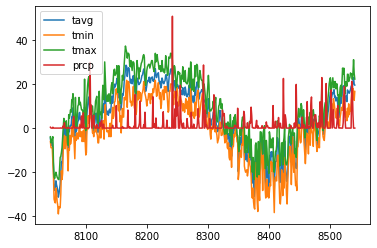

In [126]:
station_dict[list(station_dict_imp.keys())[8]][['tavg','tmin','tmax','prcp']].tail(500).plot()

<Axes: >

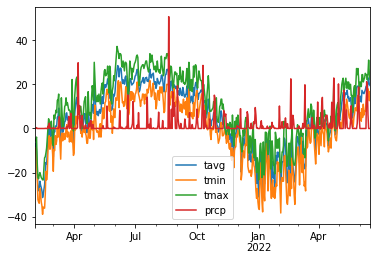

In [127]:
station_dict_imp[list(station_dict_imp.keys())[8]][['tavg','tmin','tmax','prcp']][-500:].plot()

Weird, hogy az esőzést engedte negatívba menni

# Tanulóhalmaz konstruálása

In [79]:
crops.keys()

dict_keys(['AITKIN', 'ANOKA', 'BECKER', 'BELTRAMI', 'BENTON', 'BIG STONE', 'BLUE EARTH', 'BROWN', 'CARLTON', 'CARVER', 'CASS', 'CHIPPEWA', 'CHISAGO', 'CLAY', 'CLEARWATER', 'COTTONWOOD', 'CROW WING', 'DOUGLAS', 'FARIBAULT', 'FREEBORN', 'GRANT', 'HENNEPIN', 'HUBBARD', 'ISANTI', 'ITASCA', 'JACKSON', 'KANABEC', 'KANDIYOHI', 'KITTSON', 'KOOCHICHING', 'LAC QUI PARLE', 'LAKE', 'LAKE OF THE WOODS', 'LE SUEUR', 'LINCOLN', 'LYON', 'MAHNOMEN', 'MARSHALL', 'MARTIN', 'MCLEOD', 'MEEKER', 'MILLE LACS', 'MORRISON', 'MURRAY', 'NICOLLET', 'NOBLES', 'NORMAN', 'OTTER TAIL', 'PENNINGTON', 'PINE', 'PIPESTONE', 'POLK', 'POPE', 'RAMSEY', 'RED LAKE', 'REDWOOD', 'RENVILLE', 'RICE', 'ROCK', 'ROSEAU', 'SCOTT', 'SHERBURNE', 'SIBLEY', 'ST. LOUIS', 'STEARNS', 'STEELE', 'STEVENS', 'SWIFT', 'TODD', 'TRAVERSE', 'WADENA', 'WASECA', 'WASHINGTON', 'WATONWAN', 'WILKIN', 'WRIGHT', 'YELLOW MEDICINE', 'COOK', 'OTHER (COMBINED) COUNTIES'])

In [142]:
stlcorn = crops['AITKIN']['CORN']
stlcorn

,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
0,1950,AITKIN,CORN,"CORN, GRAIN","4,800","72,000",15.0
1,1951,AITKIN,CORN,"CORN, GRAIN","4,000","128,000",32.0
2,1952,AITKIN,CORN,"CORN, GRAIN","3,300","105,600",32.0
3,1953,AITKIN,CORN,"CORN, GRAIN","3,000","87,000",29.0
4,1954,AITKIN,CORN,"CORN, GRAIN","2,700","86,400",32.0
...,...,...,...,...,...,...,...
108,2020,AITKIN,CORN,"CORN, GRAIN",690,"92,900",134.6
109,2020,AITKIN,CORN,"CORN, SILAGE","1,300",NaN,NaN
110,2021,AITKIN,CORN,CORN,NaN,NaN,NaN
111,2021,AITKIN,CORN,"CORN, GRAIN",800,"76,000",95.0


In [ ]:
crops['ST. LOUIS']['CORN']

<Axes: >

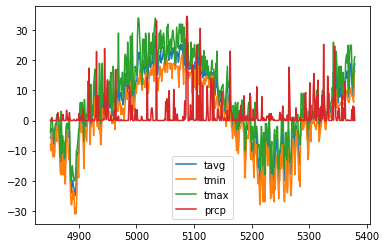

In [81]:
station_dict['KDYT0'].dropna().plot()

<Axes: xlabel='date'>

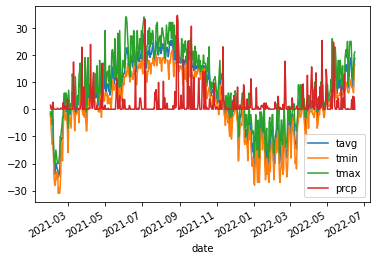

In [101]:
station_dict_imp['KDYT0'][['tavg', 'tmin', 'tmax', 'prcp']][-500:].plot()

In [103]:
closest_stations = find_closest_n(county_loc_ds,station_loc_ds,county_ds_abbr[county_ds_abbr.columns[-1]],station_ds[station_ds.columns[0]],n=1)
closest_stations

,county_abbr,0
0,AITKIN,KHZX0
1,ANOKA,9NRIJ
2,BECKER,KDTL0
3,BELTRAMI,72755
4,BENTON,72655
...,...,...
82,WATONWAN,KJYG0
83,WILKIN,KFFM0
84,WINONA,KONA0
85,WRIGHT,KCFE0


In [ ]:
ds
ds["county_abbr"]
station_dict_imp
ds

,county_abbr,0,1
0,AITKIN,KHZX0,KAIT0
1,ANOKA,9NRIJ,KMIC0
2,BECKER,KDTL0,KFFM0
3,BELTRAMI,72755,KY490
4,BENTON,72655,KPNM0
...,...,...,...
82,WATONWAN,KJYG0,KULM0
83,WILKIN,KFFM0,KETH0
84,WINONA,KONA0,KFKA0
85,WRIGHT,KCFE0,KMGG0


In [ ]:
crops[ds["county_abbr"][0]]["CORN"]


,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
0,1950,AITKIN,CORN,"CORN, GRAIN","4,800","72,000",15.0
1,1951,AITKIN,CORN,"CORN, GRAIN","4,000","128,000",32.0
2,1952,AITKIN,CORN,"CORN, GRAIN","3,300","105,600",32.0
3,1953,AITKIN,CORN,"CORN, GRAIN","3,000","87,000",29.0
4,1954,AITKIN,CORN,"CORN, GRAIN","2,700","86,400",32.0
...,...,...,...,...,...,...,...
108,2020,AITKIN,CORN,"CORN, GRAIN",690,"92,900",134.6
109,2020,AITKIN,CORN,"CORN, SILAGE","1,300",NaN,NaN
110,2021,AITKIN,CORN,CORN,NaN,NaN,NaN
111,2021,AITKIN,CORN,"CORN, GRAIN",800,"76,000",95.0


In [ ]:
this = station_dict_imp[ds[0][0]][:]["date"]
that = pd.DataFrame.from_dict(this)
that['date']= pd.to_datetime(that['date'])
that.groupby(that.date.dt.year).count()

,date
date,
2006,175
2007,332
2008,199
2009,350
2010,322
2011,350
2012,272
2013,279
2014,74


In [ ]:
count=0
for county in ds["county_abbr"]:
  print(county)
  try:
    county_crops = crops[county]["CORN"].Year.unique()
  except KeyError:
    pass
  print(county_crops)
  for i in range(2):
    this = station_dict_imp[ds[i][count]]["year"]
    print(ds[i][count])
    print(this.unique())
  count+=1    

# Getting the useful data out

In [143]:
closest_stations = find_closest_n(county_loc_ds,station_loc_ds,county_ds_abbr[county_ds_abbr.columns[-1]],station_ds[station_ds.columns[0]],n=1)
closest_stations

,county_abbr,0
0,AITKIN,KHZX0
1,ANOKA,9NRIJ
2,BECKER,KDTL0
3,BELTRAMI,72755
4,BENTON,72655
...,...,...
82,WATONWAN,KJYG0
83,WILKIN,KFFM0
84,WINONA,KONA0
85,WRIGHT,KCFE0


sort for only those states where is relevant data

In [66]:
def sorter(n):
    closest_stations = find_closest_n(county_loc_ds,station_loc_ds,county_ds_abbr[county_ds_abbr.columns[-1]],station_ds[station_ds.columns[0]],n=n)
    relevant = closest_stations.copy(deep = True)
    l = []
    for i in range(len(relevant.values)):
        if(relevant['county_abbr'][i] not in crops.keys()):
            
            l.append(i)
    return relevant.drop(l).reset_index(drop = True)

In [53]:
del crops['OTHER (COMBINED) COUNTIES']

In [65]:
def get_useful_weather_preds_for_commodity(commodity = 'CORN',n=1):
    #n means the number of places our algo will look at when making the feature set
    relevant = sorter(n)
    harvest = []
    weather = []
    index = 0
    for ca in crops.keys():
        crps = crops[ca][commodity].dropna()
        years = crps['Year']
        crp_min_year = np.min(years)
        crp_max_year = np.max(years)

        if(len(years)!=0 ):
            #ha dict lenne:
            #corn[ca] = crps
            #ha lista lenne:
            harvest.append(crps)
            temp_l = []
            for i in range(n):
                temp_l.append(station_dict_imp[relevant[i][index]]
                [(station_dict_imp[relevant[i][index]]['year']>=crp_min_year)
                & (station_dict_imp[relevant[i][index]]['year']<=crp_max_year)])
                
            weather.append(temp_l)
        index +=1
    return weather,harvest    

In [279]:
crops[list(crops.keys())[1]].keys()

dict_keys(['BARLEY', 'CORN', 'FLAXSEED', 'HAY', 'OATS', 'RYE', 'SOYBEANS', 'WHEAT', 'SUGARBEETS', 'SUNFLOWER', 'BEANS', 'CANOLA'])

In [263]:
len(list(crops.keys()))

78

In [78]:
weather,corn = get_useful_weather_preds_for_commodity(n=3)
min(weather[0][0].index)
max(weather[0][0].index)

Timestamp('2021-12-31 00:00:00')

In [73]:
corn[0].columns

Index(['Year', 'County', 'Commodity', 'Crop', 'ACRES HARVESTED',
       'PRODUCTION, MEASURED IN BU', 'YIELD, MEASURED IN BU / ACRE'],
      dtype='object')

# Feature generation

A crops és a weather is egy egy DF
ebből csinálunk egy feature setet

## corn

### Komplex modell

In the United States, corn planting typically begins in April or May, depending on the region and weather conditions. Corn emergence can occur as early as late April in the southern United States and as late as June in the northern United States.

- 'year', year of harvest
- 'harv_acr', harvested acres
- 'prod_in_bu',PRODUCTION, MEASURED IN BU
- 'yield_in_bu_per_acr',YIELD, MEASURED IN BU / ACRE
- 'tmax', max temp
- 'tavg', avg temp
- 'tmin', min temp
- 'tmed', med temp
- 'prcpts', total percipitation
- 'avg_prcpt', avg percipitation 
- 'tmaxt', max temp trend angle
- 'tavgt', avg temp trend angle
- 'tmint', min temp trend angle
- 'tmedt', med temp trend angle
- 'prcptst', total percipitation trend angle
- 'avg_prcptt', avg percipitation trend angle
- 'tid', the avg temperature deviation from the ideal 15-32°C from april to september
- 'tidd', days when the avg tmp is not in the range of 15-32°C from april to september
- 'tregslope', slope of the linear regression in temperatures
- 'gstagefrost', number of frosty days in the typical planting season of april to june
- 'gstagetavg', the avg temperature the typical planting season of april to june
- 'gstagemin',the min temperature the typical planting season of april to june
- 'gstagemax', the max temperature the typical planting season of april to june

In [ ]:
features = ['year', 'harv_acr', 'prod_in_bu', 'yield_in_bu_per_acr', 'tmax', 'tavg','tmin','tmed','prcpts',
            'avg_prcpt','tmaxt','tavgt','tmint', 'tmedt','prcptst', 'avg_prcptt','tid', 'tidd','tregslope',
            'gstagefrost', 'gstagetavg','gstagemin','gstagemax']

In [149]:
#a df egy weather adathalmaz lesz amiből kiszopkodjuk az adatot
def get_features(weather,crop):
    training_set = pd.DataFrame(columns=['year','harv_acr','prod_in_bu','yield_in_bu_per_acr','tmax','tavg','tmin','tmed','ti', 'tregslope','gstagefrost', 'gstagetavg', 'gstagemin','gstagemax'])
    for i in crop['Year'][(crop['Year']>min(weather['year']))]:
        print(i)

    return training_set

In [ ]:
corn[0]['year'][(corn[0]['year']>min(weather[0][0]['year']))]

In [145]:
#crops[list(crops.keys())[0]]['CORN']

In [151]:
get_features(weather = weather[0][0],crop=corn[0])

2007
2010
2013
2014
2016
2018
2020
2021


,year,harv_acr,prod_in_bu,yield_in_bu_per_acr,tmax,tavg,tmin,tmed,ti,tregslope,gstagefrost,gstagetavg,gstagemin,gstagemax


### Egyszerűsített modell

In [220]:
cols = ['year', 'yield', 'tmax', 'tavg','tmin','tmed','prcptsum','prcptavg','prcptmax']
#a df egy weather adathalmaz lesz amiből kiszopkodjuk az adatot
def get_features(weather,crop):
    training_set = pd.DataFrame(columns=cols)
    feat_dict = dict.fromkeys(cols, [])
    if(len(weather['year'])>0):
        for i in crop['Year'][(crop['Year']>min(weather['year']))]:
            #i = 2007
            feat_dict['year'] = i
            feat_dict['yield'] = crop[(crop['Year'] == i)]['YIELD, MEASURED IN BU / ACRE'].values[0]
            feat_dict['tmax'] = np.max(weather[(weather['year']==i)]['tmax'])
            feat_dict['tmin'] = np.min(weather[(weather['year']==i)]['tmin'])
            feat_dict['tavg'] = np.average(weather[(weather['year']==i)]['tavg'])
            feat_dict['tmed'] = np.median(weather[(weather['year']==i)]['tavg'])
            feat_dict['prcptsum'] = np.sum(weather[(weather['year']==i)]['prcp'])
            feat_dict['prcptavg'] = np.average(weather[(weather['year']==i)]['prcp'])
            feat_dict['prcptmax'] = np.max(weather[(weather['year']==i)]['prcp'])
            featdf = pd.DataFrame([feat_dict])
            training_set = pd.concat([training_set,featdf], ignore_index=True)

    return training_set

In [203]:
corn[0][(corn[0]['Year'] == 2007)]['YIELD, MEASURED IN BU / ACRE'].values[0]

80.0

In [223]:
def get_learning_feature_matrix(weather,crop,cols):
    end_df = pd.DataFrame(columns = cols)
    for i in range(len(crop)):
        for j in range(len(weather[0])):
            end_df = pd.concat([end_df, get_features(weather = weather[i][j],crop = crop[i])],ignore_index = True)
    return end_df.reset_index(drop = True)

In [ ]:
get_learning_feature_matrix(weather,corn,cols).dropna().reset_index(drop = True)

In [212]:
np.sum(weather[0][0][(weather[0][0]['year']==2007)]['prcp'])

833.525279527341

In [178]:
weather[0][0][(weather[0][0]['year']==2007)]['tmax']

date
2007-01-01    0.0
2007-01-02    0.0
2007-01-04    1.0
2007-01-05    1.0
2007-01-06    0.0
             ... 
2007-12-26   -2.0
2007-12-27   -6.0
2007-12-28   -7.0
2007-12-29   -6.0
2007-12-30   -5.0
Name: tmax, Length: 332, dtype: float64

Itt megfogjuk és leszűkítjük az adatainkat egy sorba és csinálunk egy prediction targetet 
Alapvetően a crop yieldre fog rátanulni, de kovariánsként belerakjuk a kinyert időjárásadatokat is
A cornnál fontos a jégeső pl és a csapadék
mindnél a csapadék de Szerdán ennek utánna kell nézni

note:
most jutott eszembe hogy mi lenne ha klaszterezném a target előrejelzéseket, hogy melyikhez hasonlítanak a legjobban és azokkal állítanám párba őket...

# Modellezés

In [ ]:
features = get_learning_feature_matrix(weather,corn,cols).dropna().reset_index(drop = True)

In [230]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(features, test_size=0.2)


In [233]:
list(train.columns)[0]

'year'

In [235]:
train_X = pd.concat([train[list(train.columns)[0]],train[list(train.columns)[2:]]],axis=1)
train_y = train['yield']
test_X = pd.concat([test[list(test.columns)[0]],test[list(test.columns)[2:]]],axis=1)
test_y = test['yield']

TODO
- arima
- linreg
- deeplearning
- kmeans regresszor
- egyszerűbb modellek

# Utolsó Lépés: predikció


Első lépés lesz majd mindegyik fájlt beolvasni és betömködni a lyukakat az időjárási adatokban
Ezek után szépen generálunk mindhez mindegyikhez egy egy 